## Gaussian Process Regression

Function: [***GaussianProcessRegressor***](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html) in scikit-learn

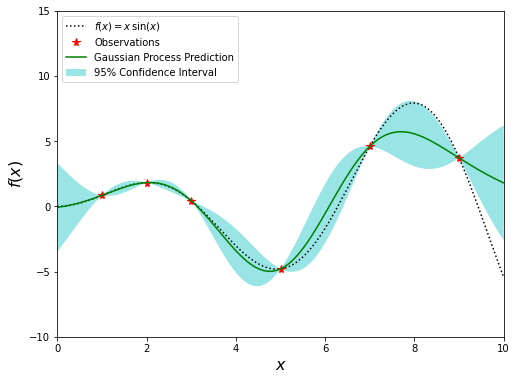

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

#  Input: X; observations: y
X = np.atleast_2d([1, 2, 3, 5, 7, 9]).T
y = (X*np.sin(X)).ravel()

# 1D mesh the input space 
x = np.atleast_2d(np.linspace(0, 10, 1000)).T
fx = x * np.sin(x)

# Build a Gaussian Process model using a customized kernel and fit the data
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp_model.fit(X, y)

model_name = "Gaussian Process"

# Make the prediction on the meshed x-axis 
y_pred, sigma = gp_model.predict(x, return_std=True)


def make_plot(X, y, y_pred, sigma, x, fx):
    # Plot the function, the prediction and the 95% confidence interval from GP
    plt.figure(figsize=(8,6))
    plt.plot(x, fx, 'k:', label='$f(x) = x\,\sin(x)$')
    plt.plot(X, y, 'r*', markersize=8, label='Observations')
    plt.plot(x, y_pred, 'g-', label=model_name+' Prediction')
    plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.96 * sigma, (y_pred + 1.96 * sigma)[::-1]]),
             alpha=.4, fc='c', ec='None', label='95% Confidence Interval')
    plt.xlabel('$x$', fontsize=16)
    plt.ylabel('$f(x)$', fontsize=16)
    plt.xlim(0, 10)
    plt.ylim(-10, 15)
    plt.legend(loc='upper left')
    return

make_plot(X, y, y_pred, sigma, x, fx)
plt.show()

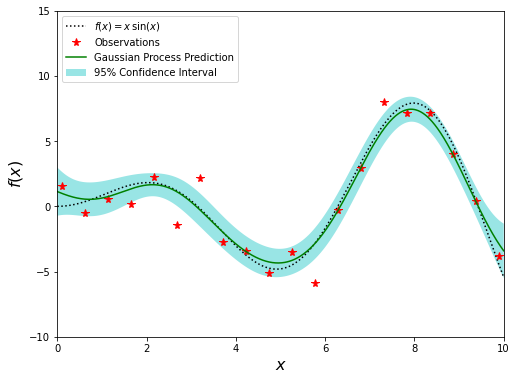

In [2]:
# THE NOISY CASE

X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = (X*np.sin(X)).ravel()
dy = 0.5 + 1 * np.random.random(y.shape)

# Define the noise
np.random.seed(1)
noise = np.random.normal(0, dy)
y += noise

# Build a Gaussian Process model using the same kernel and fit the data
gp_model = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2, n_restarts_optimizer=10)
gp_model.fit(X, y)

# Make the prediction on the meshed x-axis 
y_pred, sigma = gp_model.predict(x, return_std=True)

# Plot the results
make_plot(X, y, y_pred, sigma, x, fx)
plt.show()

## Support Vector Regression

Function: [***SVM***](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm) in scikit-learn

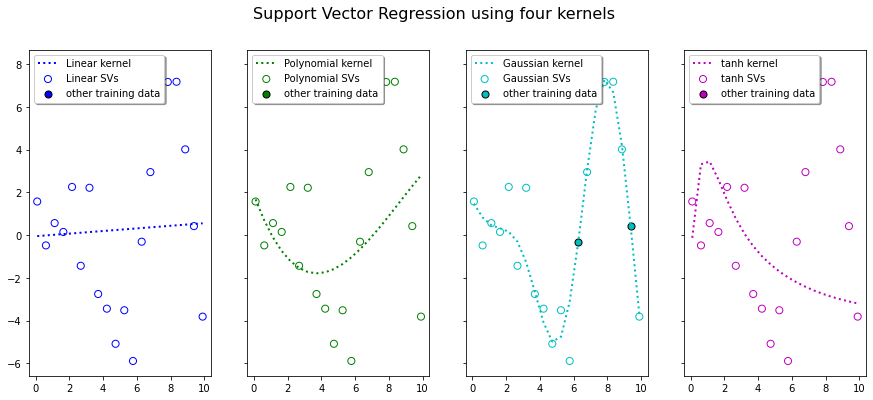

In [3]:
from sklearn.svm import SVR

# Build SVR regression models using four types of kernels
l_svr = SVR(kernel='linear', C=100, gamma='auto')
p_svr = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
g_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
t_svr = SVR(kernel='sigmoid', C=100, coef0=2)

svrs = [l_svr, p_svr, g_svr, t_svr]
label = ['Linear', 'Polynomial', 'Gaussian', 'tanh']
color = ['b', 'g', 'c', 'm']

fig, ax = plt.subplots(figsize=(15,6), nrows=1, ncols=4, sharey=True)

# Use the same dataset as above for the fitting
for i, svr in enumerate(svrs):
    # Plot the fitted model
    ax[i].plot(X, svr.fit(X, y).predict(X), ls=':', lw=2, color=color[i], label='{} kernel'.format(label[i]))
    # Plot the support vectors (SVs)
    ax[i].scatter(X[svr.support_], y[svr.support_], facecolor="none", edgecolor=color[i], s=50, label='{} SVs'.format(label[i]))
    # Plot the other data (non-support vectors)
    ax[i].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)], y[np.setdiff1d(np.arange(len(X)), svr.support_)], 
                      facecolor=color[i], edgecolor="k", s=50, label='other training data')
    # Plot a legend box
    ax[i].legend(loc='upper left', bbox_to_anchor=(0., 1.),ncol=1, fancybox=True, shadow=True)

fig.suptitle("Support Vector Regression using four kernels", fontsize=16)
plt.show()

### Unbalanced dataset example

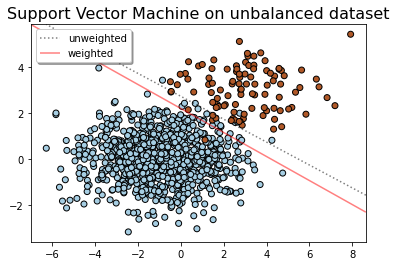

In [4]:
from sklearn import svm

# create Gaussian-distributed unbalanced dataset
n = [1000, 100]
mean = np.array([[-1.0, 0.0], [3,3]])
cov = np.diag([2,4]) * [1.5, 0.25]

x_1 = np.random.multivariate_normal(mean[0], cov, n[0])
x_2 = np.random.multivariate_normal(mean[1], cov, n[1])
X_unb = np.vstack((x_1, x_2))
y_unb = np.repeat([0,1],n)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X_unb, y_unb)

# fit the model using class weights
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X_unb, y_unb)

# plot the samples
plt.scatter(X_unb[:, 0], X_unb[:, 1], c=y_unb, cmap=plt.cm.Paired, edgecolors="k")

# get reference to axes and axes limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create mesh grid of points
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors="k", levels=[0], alpha=0.5, linestyles=[":"])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors="r", levels=[0], alpha=0.5, linestyles=["-"])
ax.set_title("Support Vector Machine on unbalanced dataset", fontsize=16)
ax.legend(
    [a.collections[0], b.collections[0]],
    ["unweighted", "weighted"],
    loc="upper left",
    bbox_to_anchor=(0., 1.0),
    ncol=1,
    fancybox=True,
    shadow=True
)
plt.show()


## Ensemble Learning Models for Regression

Function: [***XGBRegressor***](https://xgboost.readthedocs.io/en/stable/python/python_api.html) in XGBoost (scikit-learn wrapper)

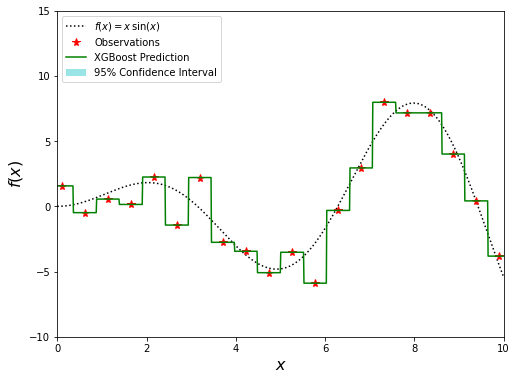

In [5]:
# XGBoost for regression
import xgboost as xgb
model_name = "XGBoost"

# Build a XGBoost model and fit the data
xgb_model = xgb.XGBRegressor(n_jobs=3)
xgb_model.fit(X, y)

# Make the prediction on the meshed x-axis 
y_pred = xgb_model.predict(x)

sigma = np.zeros(sigma.shape)
# Plot the results
make_plot(X, y, y_pred, sigma, x, fx)

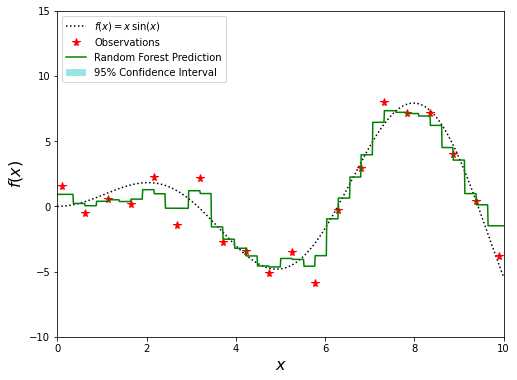

In [6]:
# Random forest for regression
from sklearn.ensemble import RandomForestRegressor
model_name = "Random Forest"

# Build a random forest model and fit the data
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Make the prediction on the meshed x-axis 
y_pred = rf_model.predict(x)

sigma = np.zeros(sigma.shape)
# Plot the results
make_plot(X, y, y_pred, sigma, x, fx)

## Compare Ensemble Learning Models for Regression

Module: [***Ensemble***](https://scikit-learn.org/stable/modules/ensemble.html) in scikit-learn

Functions: [***DecisionTreeRegressor***](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [***RandomForestRegressor***](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), [***AdaBoostRegressor***](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html), [***GradientBoostingRegressor***](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)


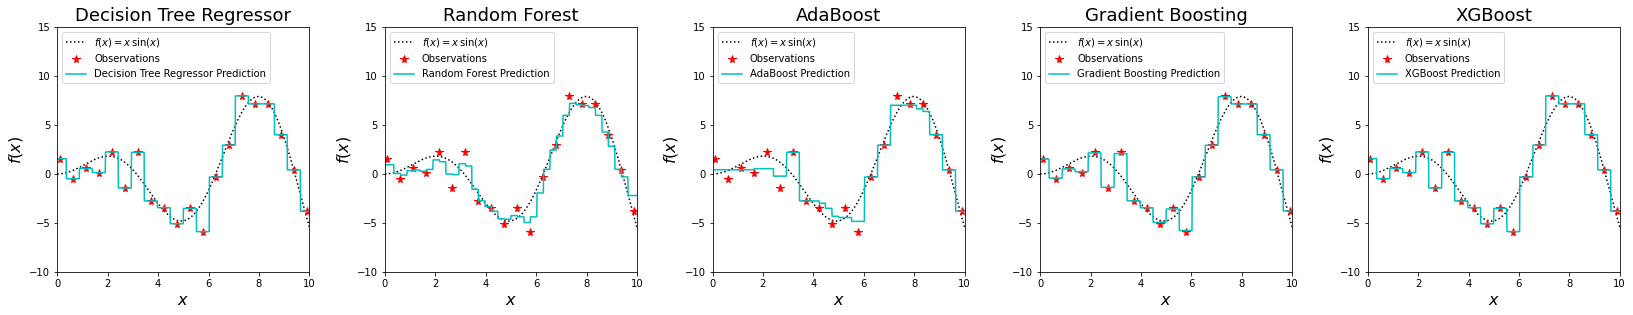

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb

reg_models = (DecisionTreeRegressor(),
              RandomForestRegressor(),
              AdaBoostRegressor(),
              GradientBoostingRegressor(),
              xgb.XGBRegressor(n_jobs=3))

reg_models = (reg.fit(X, y) for reg in reg_models)

# title for the plots
titles = ('Decision Tree Regressor',
          'Random Forest',
          'AdaBoost',
          'Gradient Boosting',
          'XGBoost')
    
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(28,4.5))
fig.subplots_adjust(wspace=0.3)
# set the step size of the mesh grid as h
h = 0.02

for model, title, ax in zip(reg_models, titles, axes):
    y_pred = model.predict(x)
    ax.plot(x, fx, 'k:', label='$f(x) = x\,\sin(x)$')
    ax.plot(X, y, 'r*', markersize=8, label='Observations')
    ax.plot(x, y_pred, 'c-', label=title+' Prediction')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$f(x)$', fontsize=16)
    ax.set_xlim(0,10)
    ax.set_ylim(-10, 15)
    ax.legend(loc='upper left')    
    ax.set_title(title, fontsize=18)
plt.show()

